<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h2 style="color: #FF8C00;">Instructions:</h2>

- **Collaboration**: You are working in **pairs**, so collaborate to create a comprehensive `README` file that outlines your project, methodologies, and findings.
- **Presentation**: Prepare and deliver a presentation that summarizes your analysis, demonstrating the depth and breadth of your work.
- **Python scripts**: You can use the this notebook or the `EDA_template` as template for your findings, but you'll have to deliver a different notebook to GitHub.
- **Extended Analysis**: Dive deeper into the data to uncover additional insights. Push the boundaries of your analysis to explore complex interactions within the portfolio.

<h1 style="color: #FF8C00;">Libraries</h1>

<h3 style="color: #FF6347;">-- Insert your code here --</h3>

---

Make sure to import all the libraries you will need to complete your tasks in this challenge.

In [3]:
import pandas as pd 
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import scipy.stats as stats
import matplotlib.pyplot as plt

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<h3 style="color: #FF6347;">Data Loading</h3>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [4]:
df = pd.read_csv('asset_price_data.csv')
hard_copy = df.copy()
print(df.head(10))
print(df.shape)

         date    Asset1  Asset2     Asset3  Asset4  Asset5
0  2019-01-02  231.5061  55.875  25.649222  302.93   50.89
1  2019-01-03  231.0356  54.977  25.503047  302.11   50.41
2  2019-01-04  230.4026  56.129  26.147133  301.77   51.38
3  2019-01-07  230.0543  56.838  25.955277  302.33   52.14
4  2019-01-08  229.7012  56.895  26.137997  303.42   52.13
5  2019-01-09  230.1550  57.630  26.197380  304.67   52.86
6  2019-01-10  230.4994  57.667  26.348124  304.78   52.89
7  2019-01-11  230.8193  57.692  26.370964  305.27   52.81
8  2019-01-14  231.0823  57.589  26.192812  305.26   52.62
9  2019-01-15  231.3187  57.966  26.338988  305.64   52.54
(783, 6)


In [11]:
df = pd.read_csv('asset_price_data.csv')

In [9]:
#in order for the assets starting at 100
normalized_df = df.set_index('date').apply(lambda x: x / x.iloc[0] * 100)

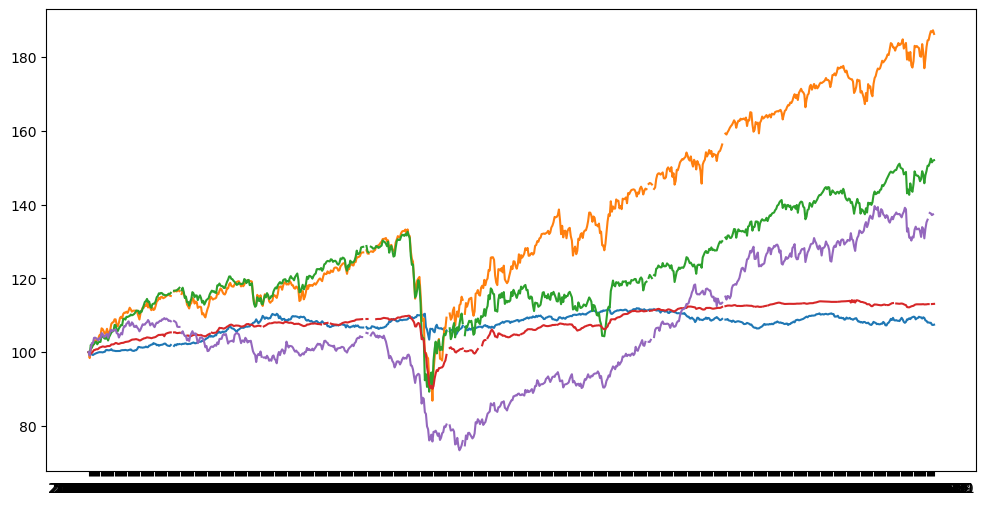

In [19]:
plt.figure(figsize=(12, 6))
for column in normalized_df.columns:
    plt.plot(normalized_df.index, normalized_df[column], label=column)

<Axes: xlabel='date'>

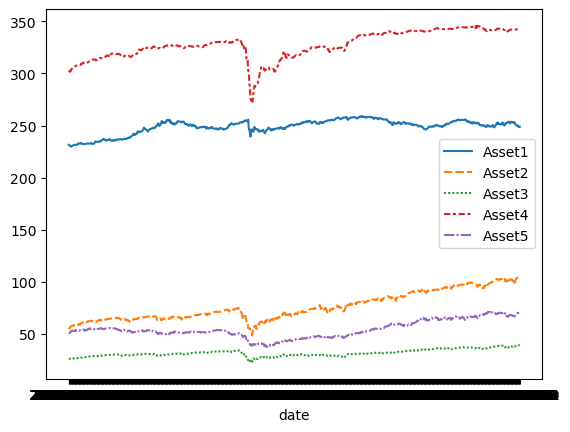

In [26]:
sns.lineplot(data=df)

In [27]:
df.set_index('date', inplace=True)
plt.figure(figsize=(30,10))
plt.title("Asset Growth Analysis")
plt.xlabel('date')
plt.grid(linestyle='--')
plt.xticks(rotation=90)
sns.lineplot(data=df)

KeyError: "None of ['date'] are in the columns"

In [ ]:
##Tried several methods to fix the date, but not managing to make it work

<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [29]:
df2 = pd.read_csv('asset_price_data.csv')
df2['date'] = pd.to_datetime(df2['date'])
df2.set_index('date', inplace=True)

In [34]:
df2 = df2.apply(pd.to_numeric, errors='coerce')

In [38]:
df2 = df.dropna()

In [42]:
daily_returns_df = df2.pct_change(fill_method=None) * 100  # Calculate percentage change in percent (internet search)
daily_returns_df = daily_returns_df.dropna()  # Remove rows with NaN values caused by pct_change (internet search)

In [43]:
print(daily_returns_df.head())

              Asset1    Asset2    Asset3    Asset4    Asset5
date                                                        
2019-01-03 -0.203234 -1.607159 -0.569902 -0.270690 -0.943211
2019-01-04 -0.273984  2.095422  2.525524 -0.112542  1.924221
2019-01-07 -0.151170  1.263162 -0.733753  0.185572  1.479175
2019-01-08 -0.153486  0.100285  0.703977  0.360533 -0.019179
2019-01-09  0.197561  1.291853  0.227193  0.411970  1.400345


<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<Axes: >

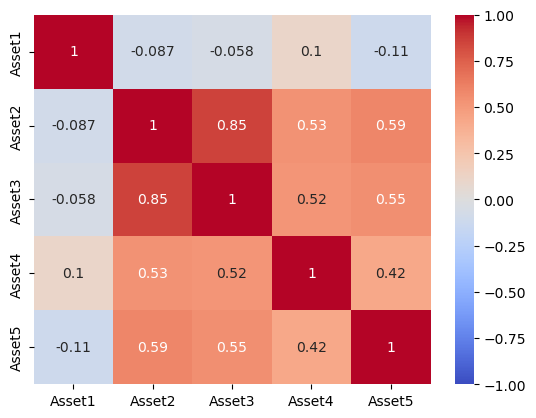

In [46]:
corr_matrix = daily_returns_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',vmax=1, vmin=-1)

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<Axes: xlabel='Asset1', ylabel='Asset5'>

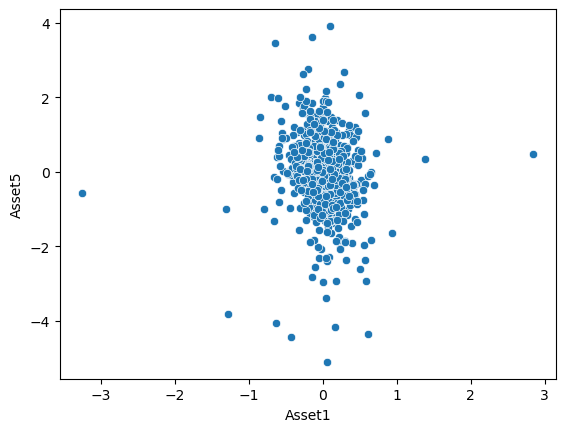

In [48]:
sns.scatterplot(data=daily_returns_df, x='Asset1', y='Asset5', )

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [51]:
weights_df = pd.read_csv('portfolio_weights.csv')
weights_df.set_index('date', inplace=True)
print(weights_df.head(10))
print(weights_df.shape)

              Asset1    Asset2    Asset3   Asset4    Asset5
date                                                       
2019-01-02  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-03  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-04  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-07  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-08  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-09  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-10  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-11  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-14  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-15  0.225458  0.116255  0.265003  0.23031  0.162974
(783, 5)


In [52]:
def_df = pd.read_csv('asset_information_data.csv')
print(def_df.head(5))
print(def_df.shape)

     Name        Family
0  Asset1  Fixed Income
1  Asset2  Fixed Income
2  Asset3        Equity
3  Asset4        Equity
4  Asset5   Alternative
(5, 2)


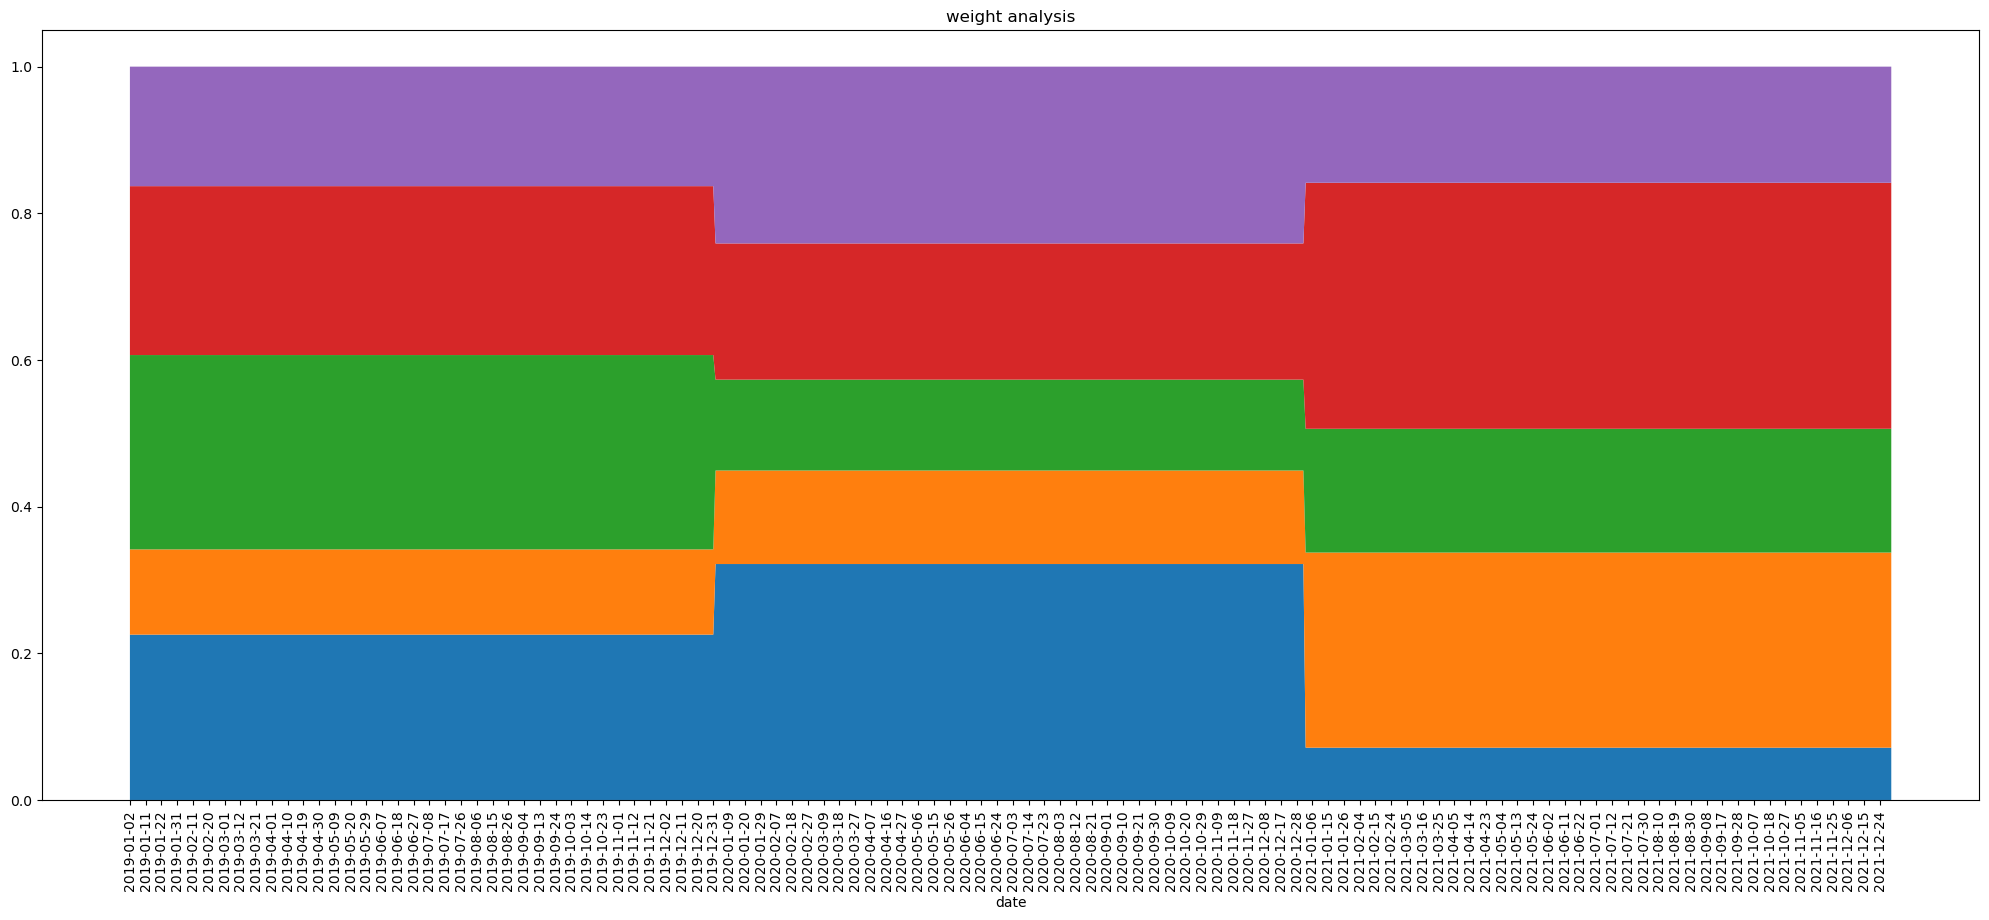

In [55]:
plt.figure(figsize=(25,10))
plt.title("weight analysis")
plt.xlabel('date')
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(df.index), 7))
plt.stackplot(weights_df.index, weights_df.iloc[:,0], weights_df.iloc[:,1], weights_df.iloc[:,2], weights_df.iloc[:,3], weights_df.iloc[:,4])

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<h2 style="color: #FF6347;">Annualized Return.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<h2 style="color: #FF6347;">Annualized Volatility.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>